<a href="https://colab.research.google.com/github/Abhishek-PratapSingh/Abhishek-PratapSingh/blob/main/Cancer_Detection_Using_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 5.2 MB/s 


In [2]:
import pywt
from Bio import SeqIO
from scipy import signal
from scipy import stats
from scipy.fft import fft
import numpy as np
import pandas as pd

In [3]:
import os

All the cancerous genomes were converted to their corresponding EIIP mapping.Statistical operations after performing FFT on the EIIP sequence:
1. Mean
2. Variance
3. Standard Deviation
4. Kurtosis
5. Entropy


In [67]:
from scipy.fft import fft
def convertMappingToSTFT(array, label):
  #STFT and statistical calculation 
  
  zxx = fft(array)
  # flatten the array
  flat = zxx.flatten()
  psd = [(abs(el)**2)/257  for el in zxx]
  data = [np.mean(psd), np.std(psd),np.var(psd), stats.skew(psd), stats.kurtosis(psd), label]
  return data


In [6]:
#convertMappingToSTFT(y,0)

In [19]:
import csv
can_data=[]
with open('/content/cancerous.csv') as file_obj:
	
	reader_obj = csv.reader(file_obj)	
	for row in reader_obj:
		can_data.append([float(i) for i in row])
#can_data[0]

In [20]:
import csv
df_non_can=[]
with open('/content/noncancerous.csv') as file_obj:
	
	reader_obj = csv.reader(file_obj)
	
	for row in reader_obj:
		df_non_can.append([float(i) for i in row])

In [66]:
final=[]
for i in can_data:
  final.append(convertMappingToSTFT(i,1))
  

In [65]:
for i in df_non_can:
  final.append(convertMappingToSTFT(i,0))

In [24]:
df = pd.DataFrame(final,columns=['mean', 'std', 'var', 'skew', 'kurtosis', 'label'])


In [25]:
df

,mean,std,var,skew,kurtosis,label
0,0.130520,6.066337,36.800450,48.197467,2320.997341,1
1,0.160357,8.322677,69.266950,53.898011,2902.997176,1
2,0.604725,60.367485,3644.233293,103.730386,10757.995301,1
3,0.630542,63.404374,4020.114672,103.730394,10757.996417,1
4,0.632369,63.627122,4048.410657,103.730395,10757.996566,1
5,0.626220,62.896644,3955.987817,103.730389,10757.995820,1
6,0.619827,62.202743,3869.181245,103.730396,10757.996783,1
7,0.616010,61.742021,3812.077142,103.730397,10757.996830,1
8,0.622853,62.550515,3912.566963,103.730401,10757.997468,1
9,0.607248,60.721525,3687.103619,103.730392,10757.996232,1


# Building the ML Model

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [30]:
model=RandomForestClassifier(n_estimators=40)

In [ ]:
df = df.sample(frac = 1)

# Separating labels and features 

In [31]:
y=df['label']
X=df.drop('label',axis=1)

# Normalization

In [32]:
for column in X:
    X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min())    
  

In [33]:
X

,mean,std,var,skew,kurtosis
0,0.114864,0.048537,0.002850,0.245321,0.116733
1,0.148222,0.068601,0.005390,0.300344,0.154394
2,0.645033,0.531401,0.285052,0.781339,0.662676
3,0.673897,0.558406,0.314456,0.781339,0.662676
4,0.675940,0.560387,0.316669,0.781339,0.662676
5,0.669065,0.553892,0.309439,0.781339,0.662676
6,0.661918,0.547721,0.302649,0.781339,0.662676
7,0.657651,0.543624,0.298182,0.781339,0.662676
8,0.665301,0.550814,0.306043,0.781339,0.662676
9,0.647855,0.534550,0.288405,0.781339,0.662676


In [34]:
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
Name: label, dtype: int64

# Splitting the dataset into training and testing data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [38]:
X_train

,mean,std,var,skew,kurtosis
2,0.645033,0.531401,0.285052,0.781339,0.662676
21,0.190645,0.096154,0.010175,0.357712,0.198136
33,0.213384,0.111196,0.013422,0.378702,0.215284
1,0.148222,0.068601,0.005390,0.300344,0.154394
32,0.156278,0.072795,0.006021,0.303469,0.156658
28,0.149982,0.068277,0.005342,0.287562,0.145270
35,0.217090,0.113266,0.013904,0.378702,0.215284
14,0.031774,0.010018,0.000206,0.087770,0.032160
22,0.100438,0.040317,0.002039,0.214566,0.097515
11,0.995671,0.994836,0.989754,1.000000,1.000000


# Training the model

In [39]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [44]:
y_pred=model.predict(X_test)

# Results

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



In [51]:
confusion_matrix(y_test,y_pred)

array([[5, 0],
       [1, 3]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


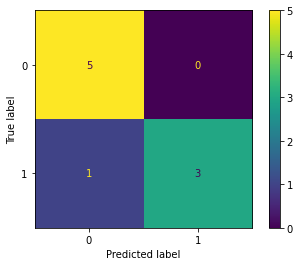

In [56]:
plot_confusion_matrix(model, X_test, y_test) 

In [64]:
score=model.score(X_test, y_test)
print("The accuracy of the model is ", 100*score)

The accuracy of the model is  88.88888888888889
